# **N1 Health Data Project**

### **Author:** Scott Grenestedt  
### **Date:** November 22, 2024  

---

### **Project Overview**  
This project analyzes publicly available datasets to provide actionable insights on food access challenges for a national Medicare Advantage plan. The analysis addresses key questions related to program deployment, population engagement, and projected impact.


#### **Terminology**
What is Medicare, and more specifically, a "National Medicare Advantage plan"?

    Medicare is a federal health insurance program primarily for people aged 65 and older, although it also covers certain younger individuals with disabilities and those with end-stage renal (kidney) disease.

**Premiums**: 

<ul>
    <li>The amount you pay <b>monthly </b> to have health insurance coverage. It's like a subscription fee for access to Medicare or other health plans. </li>
    <li>For Medicare Part B, premiums are income-adjusted, meaning higher-income retirees or individuals still working might pay more (known as IRMAA, the income-related monthly adjusted amount)</li>

</ul>

**Deductibles**: 

<ul>
    <li>The amount you pay <b>out-of-pocket</b> for covered services <b>before</b> your insurance begins to cover costs. For example, in Medicare Part B, the 2024 deductible is $240. After this is paid, you pay only coinsurance for most services

</ul>

**Coinsurance**: 

<ul>
    <li>The percentage of costs you pay <b>after meeting the deductible</b>. In Medicare Part B, you typically pay 20% of the cost of outpatient services, while Medicare pays 80%.  </li>

</ul>
<br> 

#### **Medicare has 4 segments**
<br>

**Part A: Hospital Insurance** 

<ul>
    <li>Covers inpatient hospital stays, care in skilled nursing facilities, hospice care, and some home health care </li>
    <li>Most people <b>do not</b> pay a premium for Part A if they or their spouse paid Medicare taxes while working</li>

</ul>
    
    
**Part B: Medical Insurance** 

<ul>
    <li>Covers outpatient care, doctor visits, preventive services, and durable medical equipment </li>
    <li>Requires a monthly premium, which is income-based</li>

</ul>

**Part C: Medicare Advantage** 

<ul>
    <li>An alternative to Original Medicare (Parts A and B) </li>
    <li>Offered by private insurance companies approved by Medicare</li>
    <li>Combines Parts A and B, and often includes additional benefits like dental, vision, hearing, and prescription drug coverage</li>
    <li>May have lower out-of-pocket costs but can limit provier choices through network-based plans (like HMOs and PPOs)</li>

</ul>

**Part D: Prescription Drug Coverage** 

   
<ul>
    <li>Covers prescription medications </li>
    <li>Offered by private insurers as a standalone plan or included in Medicare Advantage plans</li>
    <li>Requires a monthly premium, which varies by plan </li>

</ul>

### **Deeper look at Medicare Advantage**

Medicare Advantage (Part C) is a comprehensive alternative to Original Medicare. 

<ul>
    
<li> <b>Private Insurance</b>: These plans are offered by private insurers like UnitedHealthcare, Aetna, or Humana but are regulated and subsidized by the federal government </li>
<li> <b>Government Subsidies</b>: The government pays these insurers a fixed amount per enrollee to provide the coverage, effectively subsidizing the costs for members </li>
<li> <b>Member Costs</b>: Members may still pay premiums, copayments, and deductibles, but plans often cap annual out-of-pocket costs (unlike Original Medicare).</li>



</ul>


   - Medicare Advantage Plans are *generally* targeted towards lower-income populations, so perhaps I can focus my analysis on this demographic. It's a reasonable suspicion that lower-income households, particularly those without vehicles, will struggle with access to both food and healthcare seeing as Medicare Advantage plans limit your access to in-network providers with HMO plans. 
    
<li> <b> HMO (Health Maintenance Organization):</b> Requires members to use in-network providers and obtain referrals for specialists, offering lower costs but less flexibility. </li>
<li> <b> PPO (Preferred Provider Organization):</b> Offers more flexibility with access to both in-network and out-of-network providers, typically at a higher cost. </li>

# **Analysis and Code starts Here** 

In [250]:
# Importing Libraries

#ETL 
import sqlite3
import pandas as pd
import numpy as np

#Plotting 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [251]:
#Connecting to my SQLite database 
conn = sqlite3.connect("C:/Users/Scott/Downloads/challenge.db/challenge.db")

#Creating a cursor object
cursor = conn.cursor()


### **Exploratory Data Analysis:**
    Objective: Understand the volume of data, columns included, how tables might be joined via foreign keys, identify primary keys, and clean up duplicate or Null data

In [252]:
#List all the tables in the database:

query= """

SELECT name
FROM sqlite_master
WHERE type ='table'
; 
"""

cursor.execute(query)

#Fetch the results from the query
tables = cursor.fetchall()


#Display the tables

print(tables)


[('five_hundred_cities',), ('access',), ('variable_list',)]


#### We see that there are three tables: Let's explore the contents of each 

In [253]:
# Store DataFrames in a dictionary for easier access
dfs = {}

# Loop through each table
for table in tables:
    table_name = table[0]
    print("="*30) #Create a line separator for better readability 
    print(f"Table: {table_name}") #F-strings in Python to allow printing of string + a variable 
    print("="*30)

    # Get the number of rows for the table
    cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
    row_count = cursor.fetchone()[0]
    print(f"Number of rows: {row_count}")
    
    # Get the column names and number of columns for the table
    cursor.execute(f"PRAGMA table_info({table_name})")
    columns = cursor.fetchall()
    column_count = len(columns)
    print(f"Number of columns: {column_count}")

    # Fetch the entire table and load it into a pandas DataFrame
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql_query(query, conn)
    
    # Store the DataFrame in a dictionary
    dfs[table_name] = df

    # Optionally, print out the head and summary for the table
    print("\nSummary:")
    print(df.head())  # Show first 5 rows
    print("\nDataframe Info:")
    print(df.info())  # Show dataframe summary
    print("="*30 + "\n"*2)

Table: five_hundred_cities
Number of rows: 27210
Number of columns: 64

Summary:
   index StateAbbr   PlaceName  PlaceFIPS   TractFIPS        Place_TractID  \
0      0        AL  Birmingham     107000  1073000100  0107000-01073000100   
1      1        AL  Birmingham     107000  1073000300  0107000-01073000300   
2      2        AL  Birmingham     107000  1073000400  0107000-01073000400   
3      3        AL  Birmingham     107000  1073000500  0107000-01073000500   
4      4        AL  Birmingham     107000  1073000700  0107000-01073000700   

   Population2010  ACCESS2_CrudePrev ACCESS2_Crude95CI  ARTHRITIS_CrudePrev  \
0            3042               24.4      (21.2, 27.8)                 31.2   
1            2735               30.4      (27.1, 33.7)                 30.5   
2            3338               24.7      (21.1, 28.5)                 31.5   
3            2864               25.2      (21.6, 29.0)                 35.0   
4            2577               29.0      (24.5, 33.8) 

#### I see a FIPS code in Access, as well as more granular GEO-ID's in the five_hundred_cities table. Let's see how we can join these tables

## **Core Question 1: Where should we deploy a food access program**

Goal: Identify geographic areas, such as zip codes, counties, census tracts, etc. that are most in need of food access support

- Before I can answer this question, let's clean up my data and get a clear idea of what variables to take into consideration when planning a food access program



In [254]:
#Analyzing table structure before joining tables:

#The following query shows us that the FIPS codes from the "Access" table all contain 4 or 5 numbers. 

query= """

SELECT count(*), length(fips) fipslength
FROM Access
group by fipslength
; 
"""

cursor.execute(query)

#Fetch the results from the query
result = cursor.fetchall()


#Display the result

print(result)

#This indicates that 316 rows have a FIPS length of 4, while 2827 rows in Access have a 5-digit FIPS code. 



[(316, 4), (2827, 5)]


By looking at the challenge.db Database, I observed that the "Access" Table's FIPS code is at the **county** level, while the five_hundred_cities table has columns indicating a "Place" i.e. city, census tract, and a combination of the two values. 

- Each Tract must belong to a County, so my aim is to Inner Join the two tables by extracting the county number from the five_hundred_cities table, and joining it to Access.FIPS
    

### **Data Quality Check for INNER JOIN** 

   - Some research indicated that FIPS codes, as presented in the ACCESS table are *supposed* to be of length 5.
    
   - After filtering Data in the ACCESS table and running exploratory queries, I found that data will be most consistent if I only include the FIPS codes of length 5 from access.
    
    
#### <b>Why?</b>
        
        In cases where the FIPS code is of length 4, for example  '1073' (index 36), this matches with the 4 leftmost digits of five_hundred_cities.Tractfips, but when the leading 0 is added to make 01073, there is no longer a match. However, many of the FIPS codes of length 4 required '0' padded in the first index to match the five_hundred_cities.tractfips, and according to government standards, the TractFIPS' first 5 numbers should be equal to a state and county FIPS code. 
        
 - In short, due to an inconsistency in FIPS formatting in the "Access" table as well as inconsistent transformations needed to match either five_hundred_cities.PlaceFIPS or a 4-5 digit segment of PlaceFIPS or TractFIPS, I am choosing to conduct my analysis on a subset of the data that is "clean".
        
 
 
 
 #### Let's see if we can get a "clean" subset of the data that still represents a large enough portion of the total data to yield useful insights and statistically significant findings

In [255]:




query = """SELECT count(*) as mergedcount
FROM Access A
JOIN five_hundred_cities b 
ON A.FIPS = substr(b.TractFIPS,1,5)
and A.State = b.StateAbbr
"""

cursor.execute(query)

result = cursor.fetchall()

print(result)

[(19549,)]


Joining the tables was successful. Note that I added the additional Join clause of the states being equal to one another, just to avoid any potential edge cases where a FIPS code from ACCESS matched the leftmost 5 digits in five_hundred_cities.TractFIPS, but the states are mismatched.


In [256]:
#Lets store the 19,549 that result from the INNER JOIN in a Pandas DataFrame for further analysis

query = """
SELECT *
FROM access A
JOIN five_hundred_cities B
ON A.FIPS = substr(B.TractFIPS, 1, 5)
AND A.State = B.StateAbbr
"""

# Execute the query and load the result into a pandas DataFrame
merged_df = pd.read_sql_query(query, conn)

# Display the size and head of the merged DataFrame
print(f"Size of merged table: {merged_df.shape[0]} rows and {merged_df.shape[1]} columns")
display(merged_df.head())

Size of merged table: 19549 rows and 109 columns


,index,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,317,10003,DE,New Castle,164990.350761,122163.689387,-25.95707,30.640072,22.686807,34982.916076,...,"(81.9, 86.5)",14.9,"(13.4, 16.5)",44.7,"(42.9, 46.3)",4.4,"( 3.9, 4.9)",19.9,"(13.8, 26.6)","(39.76458634220, -75.5282126571)"
1,317,10003,DE,New Castle,164990.350761,122163.689387,-25.95707,30.640072,22.686807,34982.916076,...,"(82.4, 86.4)",15.5,"(13.9, 17.2)",45.6,"(43.8, 47.2)",4.4,"( 3.9, 4.9)",21.5,"(15.5, 27.9)","(39.76089632670, -75.5391642904)"
2,317,10003,DE,New Castle,164990.350761,122163.689387,-25.95707,30.640072,22.686807,34982.916076,...,"(80.9, 85.1)",16.5,"(15.1, 17.9)",41.9,"(40.5, 43.3)",5.0,"( 4.5, 5.5)",23.9,"(17.0, 31.3)","(39.75883975840, -75.5479434725)"
3,317,10003,DE,New Castle,164990.350761,122163.689387,-25.95707,30.640072,22.686807,34982.916076,...,"(82.2, 86.5)",17.9,"(16.2, 19.7)",47.8,"(46.0, 49.5)",5.3,"( 4.7, 5.9)",25.4,"(18.7, 33.4)","(39.75449784760, -75.5400608645)"
4,317,10003,DE,New Castle,164990.350761,122163.689387,-25.95707,30.640072,22.686807,34982.916076,...,"(82.5, 86.9)",16.6,"(15.0, 18.3)",47.6,"(45.7, 49.2)",4.9,"( 4.4, 5.4)",25.8,"(18.7, 33.9)","(39.75270589360, -75.5290070537)"


In [257]:
#The following query showed me that not all FIPS codes from Access are used in the five_hundred_cities table, which is completely fine. 
#Now let's use this cleaned subset of data to answer: 

query = """SELECT 
    count(FIPS) as missing_fips_count
FROM 
    Access
EXCEPT
SELECT 
    substr(TractFIPS, 1, 5)
FROM 
    five_hundred_cities;"""

cursor.execute(query)

result = cursor.fetchall()

print(result)

[(3143,)]


## Revisiting Core question 1: Where Should We Deploy a Food Access Program?
  
-  #### Now that the data is cleaned, let's consider these topics to help us answer the question.
      1) What numerical measure can best define an area that is "in need" of a food access program?
      2) What variables are highly correlated with an in-need county, and can we perform feature selection to select the most impactful subset of variables from the access and five_hundred_cities tables to avoid an overfitted model
      3) After identifying a few counties that are good targets for intervention, what health effects can we hope to alleviate/improve in these counties? 
      


### I have decided that counties with a high absolute number of people with Low access to food in 2015 should be the target demographic. 
 - **Counties that also have high rates of children and seniors with low access will be prioritized, if all else is equal.**
 



 - Why not percentage as opposed to crude value?
     - Very many counties **(see following screenshot)** have percentage values of 100% or 99%, and there are even counties where percentage values exceeed 100%, which indicates mistakes in either data entry, counting of populations, or other data quality issues.
     - With so many counties with high percentages of food access issues, I have to decide where is the most efficient location to allocate a limited set of resources. To help the most amount of people, I believe in deploying food access programs in urban counties with large populations struggling with food access.
     - Urban centers tend to have better access to public transportation and more government funding with food access programs, meaning the impact of a food access program may benefit more people and be more easily accessible than in a rural county, even if it has a high percentage of people lacking proper food access. 
 

Why 2015 as opposed to 2010, or looking at both years?
   - 2015 is, of course, more recently updated data and thus holds more weight than older data, very generally speaking. 
   - A quick look through the database suggested that food access issues that were prevalent for counties in 2010, are still prevalent in the same counties in 2015. 

![Data Visualization](C:/Users/Scott/Pictures/pctlowaccess.png)


Before I finalize which County to select for a food access program deployment, let's undergo Feature Selection to identify **which variables in the "Access" Table most strongly predict a large amount of low-access individuals**

In [262]:
# Identify numeric columns only
numeric_columns = merged_df.select_dtypes(include=['number']).columns

# Dynamically select numeric predictor columns (all except the dependent variable)
predictor_columns = [col for col in numeric_columns if col != 'LACCESS_POP15']

# Prepare the dataset and drop rows with missing or zero values
cleaned_data = merged_df[predictor_columns + ['LACCESS_POP15']].replace(0.0, pd.NA).dropna()

# Define the features (X) and target variable (y)
X_features = cleaned_data[predictor_columns]  # Independent variables
y_target = cleaned_data['LACCESS_POP15']      # Dependent variable

# Train a Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=333)
random_forest_model.fit(X_features, y_target)

# Compute feature importance scores
feature_importance_scores = pd.DataFrame({
    'Predictor': X_features.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importance scores
print(feature_importance_scores)


                 Predictor    Importance
22         LACCESS_CHILD15  6.931885e-01
5            LACCESS_POP10  1.958356e-01
33         LACCESS_BLACK15  5.907396e-02
31         LACCESS_WHITE15  2.873761e-02
27       LACCESS_SENIORS15  5.084684e-03
..                     ...           ...
53     ARTHRITIS_CrudePrev  4.935837e-10
59           CHD_CrudePrev  4.097744e-10
62  COLON_SCREEN_CrudePrev  2.743932e-10
73         MHLTH_CrudePrev  2.854683e-11
61    CHOLSCREEN_CrudePrev  1.904141e-11

[80 rows x 2 columns]


#### Now we have a constant between 0-1 for each independent variable within the "Access" table that indicates its predictive power in determining if an area will have a large population with food access issues. 
    - It's instantly obvious that the "LACCESS_CHILD15" column accounts for more variability in the response variable than any other feature, perhaps suggesting that if an area's children (whom are generally treated with more care/caution than adults) are suffering from food access issues, then the county as a whole may be struggling as well. 
    - The 2nd variable being "LACCESS_POP10" verified my previous claim that there is a strong linear connection between Counties that have food access issues in 2010 and 2015, hence why I have chosen to analyze the more recent subset of data for this study. 
    




##### Remember that we particularly care about communities with a large senior population, as that's the primary target demographic of Medicare Advantage plans. 

   - Let's explore counties that tick all 3 considerations: High population with low access to food, many children with low access, and many seniors with low access.

In [266]:
# Deduplicate rows to ensure unique County entries
unique_merged_df = merged_df.drop_duplicates(subset='County')

# Top 5 counties by LACCESS_POP15
top_laccess_pop15 = unique_merged_df[['County', 'State', 'LACCESS_POP15']].sort_values(
    by='LACCESS_POP15', ascending=False
).head(5)

# Top 5 counties by LACCESS_CHILD15
top_laccess_child15 = unique_merged_df[['County', 'State', 'LACCESS_CHILD15']].sort_values(
    by='LACCESS_CHILD15', ascending=False
).head(5)

# Top 5 counties by LACCESS_SENIORS15
top_laccess_seniors15 = unique_merged_df[['County', 'State', 'LACCESS_SENIORS15']].sort_values(
    by='LACCESS_SENIORS15', ascending=False
).head(5)

# Find overlapping counties across all three lists
overlap = pd.merge(
    top_laccess_pop15, top_laccess_child15, on='County', how='inner', suffixes=('_pop15', '_child15')
)
overlap = pd.merge(overlap, top_laccess_seniors15, on='County', how='inner')

# Display results
print("Top 5 Counties by LACCESS_POP15 (Unique):")
print(top_laccess_pop15)

print("\nTop 5 Counties by LACCESS_CHILD15 (Unique):")
print(top_laccess_child15)

print("\nTop 5 Counties by LACCESS_SENIORS15 (Unique):")
print(top_laccess_seniors15)

print("\nCounties Appearing in All Three Top 5 Lists:")
print(overlap)


Top 5 Counties by LACCESS_POP15 (Unique):
        County State  LACCESS_POP15
16285   Harris    TX  740267.412661
17256  Tarrant    TX  463702.839418
14931    Bexar    TX  451601.664033
15483   Dallas    TX  393661.068695
2262      Cook    IL  373742.394052

Top 5 Counties by LACCESS_CHILD15 (Unique):
        County State  LACCESS_CHILD15
16285   Harris    TX    219002.492912
17256  Tarrant    TX    128700.329762
14931    Bexar    TX    116520.346723
15483   Dallas    TX    108978.768135
16879  Hidalgo    TX     96116.276486

Top 5 Counties by LACCESS_SENIORS15 (Unique):
          County State  LACCESS_SENIORS15
16285     Harris    TX       58163.408469
13441  Allegheny    PA       53613.316312
2262        Cook    IL       51870.324323
5512   Middlesex    MA       50145.960086
6097     Oakland    MI       46943.657325

Counties Appearing in All Three Top 5 Lists:
   County State_pop15  LACCESS_POP15 State_child15  LACCESS_CHILD15 State  \
0  Harris          TX  740267.412661           

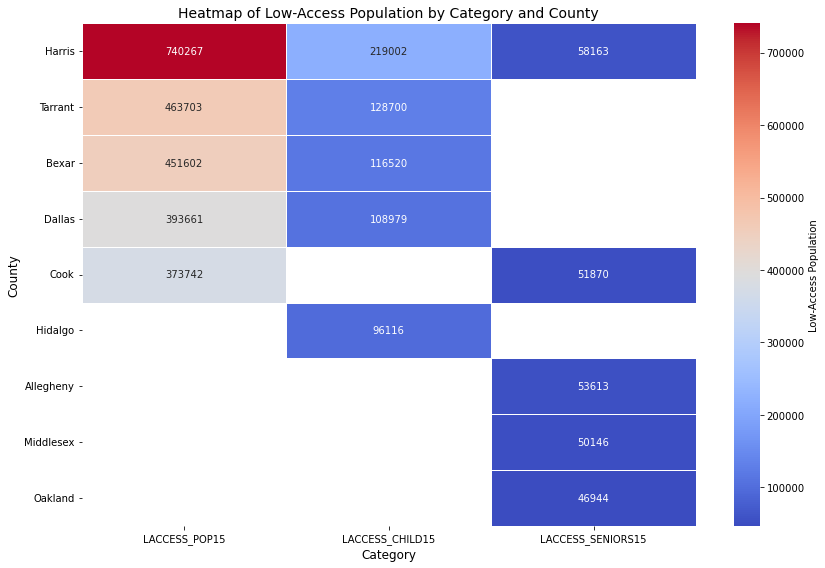

In [267]:
import seaborn as sns
import numpy as np

# Combine the data into a single DataFrame for heatmap visualization
heatmap_data = pd.DataFrame({
    'County': ['Harris', 'Tarrant', 'Bexar', 'Dallas', 'Cook', 'Hidalgo', 'Allegheny', 'Middlesex', 'Oakland'],
    'State': ['TX', 'TX', 'TX', 'TX', 'IL', 'TX', 'PA', 'MA', 'MI'],
    'LACCESS_POP15': [740267.412661, 463702.839418, 451601.664033, 393661.068695, 373742.394052, np.nan, np.nan, np.nan, np.nan],
    'LACCESS_CHILD15': [219002.492912, 128700.329762, 116520.346723, 108978.768135, np.nan, 96116.276486, np.nan, np.nan, np.nan],
    'LACCESS_SENIORS15': [58163.408469, np.nan, np.nan, np.nan, 51870.324323, np.nan, 53613.316312, 50145.960086, 46943.657325]
}).set_index('County')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data.drop(columns=['State']),  # Exclude 'State' from heatmap values
    annot=True,
    fmt=".0f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Low-Access Population'}
)
plt.title("Heatmap of Low-Access Population by Category and County", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("County", fontsize=12)
plt.tight_layout()
plt.show()

### Choosing a county:

Now having explored the Counties with the highest numbers of low-food-access individuals overall, for children, and for seniors, I see that <b> Harris County, Texas </b> stands out as being high on all 3 lists. This indicates that this county may be a suitable target for an intervention, where we can establish a food access program. 

## **How many people will be included in the Food Access Program?**

First let's consider that our client is a Medicare Advantage Plan, and Medicare plans, with a few exceptions, primarily target the senior population. So amongst the total amount of people with low access to food in Harris County (740267), let's identify what portion of that county is a Senior. 

In [285]:
query = """
    select laccess_seniors15
    from access
    where state ='TX'
    and County = 'Harris'
    """

cursor.execute(query)

result = cursor.fetchall()

print(result)
            

[(58163.4084691074,)]


Of the nearly 800,000 people with low access to food in Harris County, about 58,000 appear to be Seniors as of 2015. We can imagine that not all seniors have access to public transportation, and not all of them drive. Let's explore if there are any fields in the "Access" table that indicate a lack of transportation..

 - I have identified "LACESS_HHNV15": Which shows the number of households with no vehicle in 2015. Harris county had 12,878 such households, and assuming that an average household has 3 people, I estimate that 12,878 * 3 ~ 38,000 people in Harris county have poor access to food and no vehicle. 
 - This value represents about 5% of the 800,000 Low-access people in Harris county. 

Assuming that this Food Access Program will be rolled out and targetting the Senior demographic, it's likely that only the subset of the sample that has appropriate access to transportation will benefit from the program, and there are other variables to consider such as if the targetted individuals are aware of a food access program, if they are interested in it, what the perceived benefit of it is, etc.

- **With no concrete data to quantify what portion of the Senior population will be interested or have access to our Food Access Program, I will go with a conservative estimate of 50%, meaning the program aims to include _about 30,000 Seniors in Harris County, Texas_**

## 3) Which subgroup of the population might benefit the most?

**Determine target groups (e.g., children, seniors, low-income households) based on vulnerability and impact potential.**

As previously stated, the subgroup of the population who will benefit the most should be Seniors. This is primarily due to the fact that as a Medicare Advantage Plan, the vast majority of your clients are Senior citizens. In addition, we anticipate that children will benefit substantially from a Food Access Program, seeing as the variable with the highest correlation with Low-Access populations, was the number of children with low access to healthy food. 
- It's also not uncommon for there to be 3-generation-households, in which children and grandchildren live with their Seniors, so a food access program that benefits Seniors is likely to have a trickle-down affect and positively impact their children/grandchildren as well.

## 4) What is the projected impact of this program?

I anticipate that improving access to quality food will improve overall health in target counties, such as Harris, TX. 
- I will use Obesity as the primary marker of a County's health, as explained below. 

- Consider variables from the five_hundred_cities table, which outlines health outcomes such as Obesity, Diabetes, etc. Refer to the following correlation analysis between Obesity and food access


The features that stand out as good targets for being a dependent variable i.e. best measure of a county's health include obesity rates, diabetes, and "ACCESS2_CrudePrev", which is the percentage of adults who lack health insurance. For this analysis, let's take a deeper look at Obesity rates, and perform Random Forest feature selection using the entire set of variables from our merged table (Access --Inner Join-- five_hundred_cities) to see what results in a county facing high obesity rates. 

In [276]:
# Define all numeric independent variables from the merged table (excluding the dependent variable)
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
independent_variables = [col for col in numeric_columns if col != 'OBESITY_CrudePrev']

# Drop rows with missing or zero values in independent variables and the dependent variable
cleaned_data = merged_df[independent_variables + ['OBESITY_CrudePrev']].replace(0.0, pd.NA).dropna()

# Define the features (X) and target variable (y)
X_features = cleaned_data[independent_variables]  # Independent variables
y_target = cleaned_data['OBESITY_CrudePrev']      # Dependent variable

# Train a Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=444)
random_forest_model.fit(X_features, y_target)

# Compute feature importance scores
feature_importance_scores = pd.DataFrame({
    'Predictor': X_features.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importance scores
print("Feature Importance Scores for OBESITY_CrudePrev:")
print(feature_importance_scores)


Feature Importance Scores for OBESITY_CrudePrev:
              Predictor  Importance
76      PHLTH_CrudePrev    0.367433
67   CSMOKING_CrudePrev    0.130827
72        LPA_CrudePrev    0.116047
79  TEETHLOST_CrudePrev    0.074539
69   DIABETES_CrudePrev    0.073392
..                  ...         ...
4                  FIPS    0.000549
2                 index    0.000457
23      LACCESS_CHILD15    0.000398
22      LACCESS_CHILD10    0.000332
6         LACCESS_POP15    0.000301

[80 rows x 2 columns]


We can see that the Random Forest indicates the features that most strongly predict obesity include:
   - 1) PHLTH_CrudePrev: The percent of the County that self-reported as experiencing poor health for 14 or more days in the past month
   - 2) CSMOKING_CrudePrev: Percentage of Smokers
   - 3) LPA_CrudePrev: High blood cholesterol percentage 

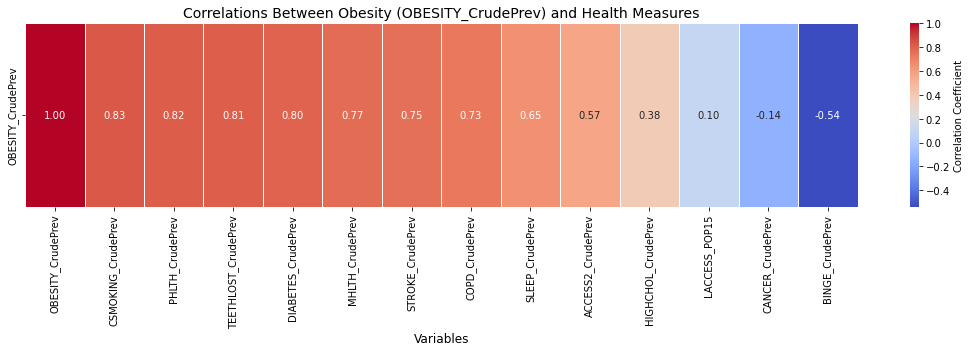

In [284]:
# Adjust the correlation matrix for horizontal alignment
plt.figure(figsize=(15, 5))
sns.heatmap(
    obesity_correlation.T,  # Transpose for a horizontal layout
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Correlations Between Obesity (OBESITY_CrudePrev) and Health Measures", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.tight_layout()
plt.show()


### **Interpretation**
- While one might consider using the **percentage of individuals who self-identify as sick** as a robust measure of a county's overall health, I believe that **obesity rates** serve as a more consistent and objective indicator.  
- Obesity is a measurable metric that avoids the subjectivity of self-reported data and is strongly tied to chronic health issues.  
- To validate this assertion, we can see the graph above which shows a strong correlation between Obesity and:
  - Self-assessed unhealthy individuals
  - Teeth lost
  - Diabetes
  - Stroke
  - Smoking rates  
  - Other chronic health conditions  

This indicates that obesity is highly correlated with poor health outcomes, reinforcing its value as a proxy for overall county health.

---




Note that although we see that Obesity is highly linearly correlated with other negative health outcomes, you may realize that the linear correlation between LACCESS_POP15 is positive, but only has a coefficient of 0.1. 
 - To further investigate the relationship between access to food and health outcomes, I will perform another round of feature selection, in which "ACCESS2_CRUDE" will be used as the dependent variable, and a selection of features from five_hundred_cities will be used to see which variables amongst: Obesity, Cancer, Asthma, Binge_eating, High_blood_pressure, and Arthitis are most closely linked with Low access to healthcare.
 
 - **My hypothesis is that this round of feature selection using only variables from one table will yield a much stronger relation bewteen food access and obesity.**
 
 A nice feature of Random Forest feature selection is that we can identify an "importance" score that is not limited to identifying linear relationships between variables, as polynomial relationships are taken into consideration too. 

In [279]:
# Define the columns to use
feature_columns = [
    'ARTHRITIS_CrudePrev', 'BINGE_CrudePrev', 'BPHIGH_CrudePrev',
    'CANCER_CrudePrev', 'CASTHMA_CrudePrev', 'OBESITY_CrudePrev'
]
dependent_variable = 'ACCESS2_CrudePrev'

# Query to extract the necessary columns from five_hundred_cities
query = f"""
SELECT {', '.join(feature_columns)}, {dependent_variable}
FROM five_hundred_cities
WHERE {dependent_variable} IS NOT NULL
"""

# Load the data into a DataFrame

data = pd.read_sql_query(query, conn)


cleaned_data = data.dropna() # Drop rows with missing values

# Define the features (X) and target variable (y)
X_features = cleaned_data[feature_columns]
y_target = cleaned_data[dependent_variable]

# Train a Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=444)
random_forest_model.fit(X_features, y_target)

# Compute feature importance scores
feature_importance_scores = pd.DataFrame({
    'Feature': X_features.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importance scores
print(feature_importance_scores)


               Feature  Importance
5    OBESITY_CrudePrev    0.464662
3     CANCER_CrudePrev    0.162152
4    CASTHMA_CrudePrev    0.151286
1      BINGE_CrudePrev    0.123652
2     BPHIGH_CrudePrev    0.058048
0  ARTHRITIS_CrudePrev    0.040201


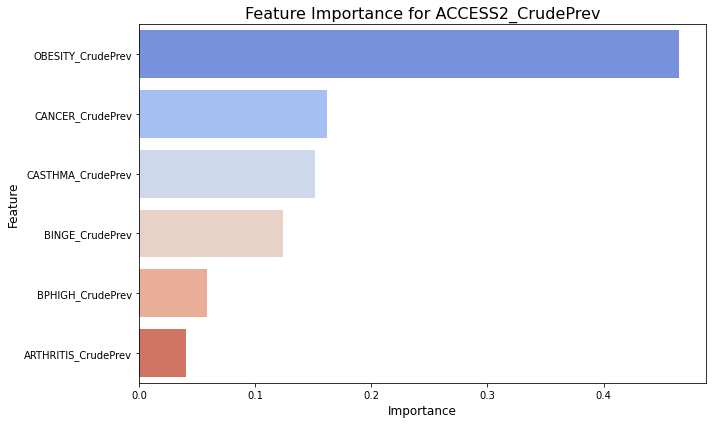

In [280]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_scores,
    palette='coolwarm'
)

# Add titles and labels
plt.title('Feature Importance for ACCESS2_CrudePrev', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

Here we can confirm that amongst the selected features from five_hundred_cities, Obesity does in fact have the strongest relationship with the Access to proper food, as indicated by the response variable **ACCESS2_CrudePrev**

# **Summary of Analysis**
1. **Identified Locations with Poor Food Access:**  
   - Analyzed metrics to pinpoint counties with significant food accessibility challenges.  

2. **Explored Contributing Factors:**  
   - Examined key variables influencing poor food access, such as socioeconomic and demographic indicators. Examples included areas with high populations of seniors and children facing food access issues. 

3. **Connected Food Access to Health Outcomes:**  
   - Established the relationship between limited food access and health outcomes like obesity, diabetes, and high blood pressure.  

4. **Analyzed Obesity and Related Variables:**  
   - Identified additional factors contributing to obesity and examined how they reflect broader population health.  

---

### **Answered the Project's Key objecties**


1. **Where should we deploy a food access program?**  
   - Harris County, Texas. 

2. **How many people will be included?**  
   - 30,000 Individuals 

3. **Which subgroup of the population might benefit the most?**  
   - Seniors and children

4. **What is the projected impact of this program?**  
   - An improvement in overall health, measured as a reduction in Obesity rates. This was determined as the "best"/most robust model for a County's health, as a reduction in Obesity is highly correlated with improvements in other health metrics such as high blood pressure, diabetes, and self-assessment of individual health. 